# GetAround Analysis EDA Project

This project is for [JEDHA](https://www.jedha.co/) Data Science Full-Stack Bootcamp.

### Let's start by installing the packages

In [438]:
import warnings
warnings.filterwarnings('ignore')

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [378]:
pd.pandas.set_option('display.max_columns', None)
df = pd.read_excel("/Users/yagmuraslan/Desktop/JEDHA/deployment/Getaround_analysis/data/get_around_delay_analysis.xlsx",
                  sheet_name='rentals_data')
metadata = pd.read_excel("/Users/yagmuraslan/Desktop/JEDHA/deployment/Getaround_analysis/data/get_around_delay_analysis.xlsx",
                  sheet_name='Documentation')


In [379]:
metadata

,field name,Comment
0,rental_id,Unique identifier of the rental
1,car_id,Unique identifier of the car
2,checkin_type,Flow used for both checkin and checkout. (ie. ...
3,state,canceled means that the rental did not happen ...
4,delay_at_checkout_in_minutes,Difference in minutes between the rental end t...
5,previous_ended_rental_id,id of the previous ended rental of the car (NU...
6,time_delta_with_previous_rental_in_minutes,Difference in minutes between this rental plan...


In [380]:
df.head(20)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN
8,512475,322502,mobile,canceled,NaN,NaN,NaN
9,513434,256528,connect,ended,23.0,NaN,NaN


In [381]:
num_features = []
cat_features = []
for i,t in df.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        num_features.append(i)
    else :
        cat_features.append(i)

print('Numeric features:', num_features)
print('categorical features:', cat_features)

Numeric features: ['rental_id', 'car_id', 'delay_at_checkout_in_minutes', 'previous_ended_rental_id', 'time_delta_with_previous_rental_in_minutes']
categorical features: ['checkin_type', 'state']


But we know that car ID and rental IDs are not quantities but instead identifiers. So we will make sure that they pass as categorical features:

In [382]:
df['previous_ended_rental_id'] = df['previous_ended_rental_id'].astype('Int64', errors = 'ignore').astype(str)
df['rental_id'], df['car_id'] = df['rental_id'].astype(str), df['car_id'].astype(str)

num_features = []
cat_features = []
for i,t in df.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        num_features.append(i)
    else :
        cat_features.append(i)
print('Numeric features:', num_features)
print('categorical features:', cat_features)

Numeric features: ['delay_at_checkout_in_minutes', 'time_delta_with_previous_rental_in_minutes']
categorical features: ['rental_id', 'car_id', 'checkin_type', 'state', 'previous_ended_rental_id']


### Let's find out what each variable means

In [383]:
with pd.option_context('display.max_colwidth', None):
    display(metadata)

,field name,Comment
0,rental_id,Unique identifier of the rental
1,car_id,Unique identifier of the car
2,checkin_type,"Flow used for both checkin and checkout. (ie. access and return the car)\nmobile = rental agreement signed on the owner's smartphone\nconnect = car equiped with the Connect technology , opened by the driver with his smartphone.\nNote: paper contracts were excluded from the data as we have no data on their delay at checkout and it's negligible use case"
3,state,canceled means that the rental did not happen (was canceled by the driver or the owner).
4,delay_at_checkout_in_minutes,Difference in minutes between the rental end time requested by the driver when booking the car and the actual time the driver completed the checkout. Negative values mean that the driver returned the car in advance.
5,previous_ended_rental_id,id of the previous ended rental of the car (NULL when no previous rental or delay with previous rental higher than 12 hours)
6,time_delta_with_previous_rental_in_minutes,"Difference in minutes between this rental planned start time and the previous rental planned end time (when lower than 12 hours, NULL if higher)"


### Missing Data

In [384]:
print("Percentage of missing values: % ")
display(100*df.isnull().sum()/df.shape[0])

Percentage of missing values: % 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                       0.000000
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

## Descriptive Stats

In [385]:
print("Number of columns in the dataset is", df.shape[1])
print("Number of car rentals registered in the dataset is", df.shape[0])
print("Number of different cars company rents in the dataset is",len(df['car_id'].unique()))

Number of columns in the dataset is 7
Number of car rentals registered in the dataset is 21310
Number of different cars company rents in the dataset is 8143


In [386]:
df.describe()

,delay_at_checkout_in_minutes,time_delta_with_previous_rental_in_minutes
count,16346.000000,1841.000000
mean,59.701517,279.288430
std,1002.561635,254.594486
min,-22433.000000,0.000000
25%,-36.000000,60.000000
50%,9.000000,180.000000
75%,67.000000,540.000000
max,71084.000000,720.000000


- Out of 21310 rental cases, only for 16346 we have the delay at checkout information. And only 1841 of these cars were anticipated to be checked-in by a second driver within the next 12 hours after the first checkout.
- As also suggested in the metadata, time delta with previous rental is limited by a ceiling value of 720 minutes (12 hours). On the other hand, the entry registerers did not apply such filtering to the delay data, therefore, we ended up having an extremely wide range with possible outliers. The maximum delay time is 71084 minutes, this is almost 50 days!!!
- Average delay time is 59 minutes, that is almost an hour.
- Time delta with previous rental is the only variable the company has a control on. And if we look at the average, we can see it is near 279 minutes (4.5 hours). This is the average time interval the company prefers to have between to consecutive vehical rentals.
- Yet, we can see that there are cases like the company left no interval time between the previous checkout and next check-in (min value = 0), which does not sound a very good idea businesswise !
- The minimum value of delay is -22433 hours (nearly 15 days), that means the driver who returned the car earliest returned it 15 days before the forecasted check-in date.

Now let's visualize the variable distributions both for categorical and numeric variables.

## Categorical Variables

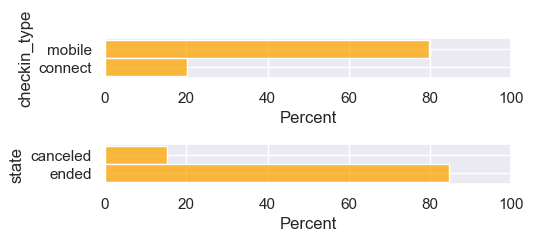

In [387]:
fig, axes = plt.subplots(2, 1, figsize=(5.5, 2.3))  
axes = axes.flatten()
sns.set_theme()
for i, column in enumerate(['checkin_type','state']):
    ax=axes[i]
    sns.histplot(y=column, data=df, ax=ax, stat="percent", color = "orange") 
    ax.set_xlim(0,100)


plt.tight_layout()
plt.show()

- Near 80% of the users signed the rental contract on their mobile phone, whereas only 20% used the Connect technology equipped in the car.
- Near 85% of the bookings in the dataset ended without cancelation.

## Numeric Variables

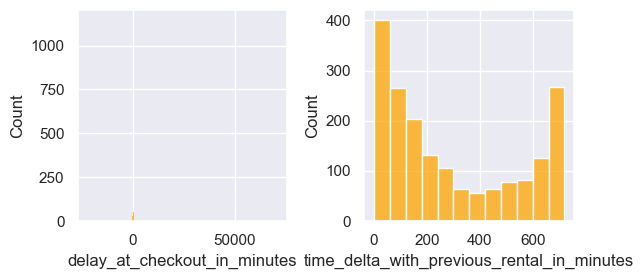

In [388]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))  
axes = axes.flatten()

for i, column in enumerate(num_features):
    sns.histplot(x=column, data=df, ax=axes[i], stat="count", color = "orange") 

plt.tight_layout()
plt.show()

- The figure on the right shows that out of 1841 cases where there was a second rental, near 400 was planned with nearly less than an hout time interval between the previous checkout and next check-in! This is nearly 25% of the cases!
- The issue with the graph on the left is that the delay at checkout has so extreme values (as we have suspected in the descriptive statistics table) that we cannot properly visualize its distribution without neglecting them.
- Let's add upper and lower bounds: 

<AxesSubplot:xlabel='delay_at_checkout_in_minutes', ylabel='Count'>

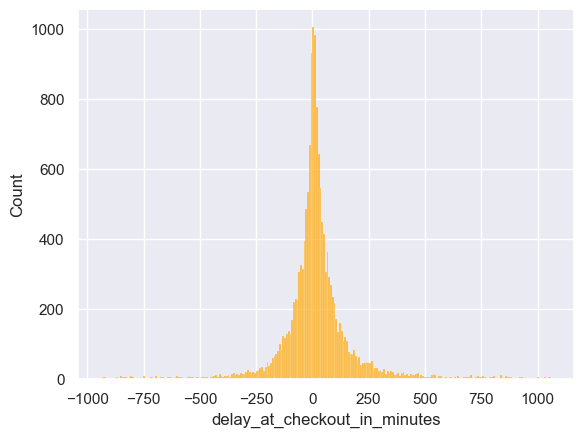

In [389]:
lower_bound = df['delay_at_checkout_in_minutes'].mean() - df['delay_at_checkout_in_minutes'].std()
upper_bound = df['delay_at_checkout_in_minutes'].mean() + df['delay_at_checkout_in_minutes'].std()

data = df[(df['delay_at_checkout_in_minutes'] > lower_bound) & (df['delay_at_checkout_in_minutes'] < upper_bound)]
sns.histplot(x='delay_at_checkout_in_minutes', data=data, stat="count", color = "orange") 

- As we can see the majority of the observations are clustered within just one standard deviation from the mean delay time.
- It is quite rare to be late more than 5 hours.

## Features affecting cancelations

We know that cancelations mean business losing money. So we want to understand the reasons to be able to minimize them.
Now, to be able to investigate which features affect the cancelations, I will create two new variabls to know the delay time from the previous rental for each car, if the same vehicle was previously rented by another driver:

- previous_delay_time : shows how many minutes the previous driver delayed on his own checkout date. Negative values mean that driver returned the car in advanced.
- minutes_passed_checkin_time = previous_delay_time - time_delta_with_previous_rental_in_minutes , shows how many minutes the vehicle was late for the current driver's checkin due to the previous drivr's delay. Negative values mean that the car (whether late or not) still returned before the check-in hour of the current customer. Positive values indicate that the return time of the car was already passed the next check-in.

In [390]:
df2 = df[['rental_id', 'delay_at_checkout_in_minutes']]
df2 = df2.rename(columns={'rental_id': 'previous_ended_rental_id', 
                          'delay_at_checkout_in_minutes': 'previous_drivers_delay_in_mins'})
df = pd.merge(df, df2, on='previous_ended_rental_id', how='left')
df['minutes_passed_checkin_time'] = df['previous_drivers_delay_in_mins'] - df['time_delta_with_previous_rental_in_minutes']

### How often are drivers late for the next check-in? 
To answer this, I will create a third variable with a binary outcome : late for the next check in or not.

In [393]:
def is_late(x):
    if x > 0:
        return "late"
    elif x < 0:
        return "not late"
    else:
        return np.nan
df['is_late_for_next_checkin'] = df['minutes_passed_checkin_time'].apply(is_late)


In [412]:
data = df[df['is_late_for_next_checkin'].isna()==False]
data = data.groupby(['is_late_for_next_checkin'])['is_late_for_next_checkin'].count().reset_index(name='count')
fig = px.pie(data, values='count', names='is_late_for_next_checkin')
fig.update_layout(
    height=400,  
    width=500,   
)

fig.show()

Drivers are late for the next checkin 218 out of 1841 times where there was a second rental

Note that there is an interesting mismatch in the dataset. 
- The data on time_delta is available for 1841 observations.
- But the data on previous driver's delay in minutes is available for 1729 observations. This indicates that there were variables where previous rental IDs and registry rental IDs didn't match.
- The info on whether the previous driver was late or not is available for 1724 variables, we should be missing the information on the expected checkout time for 5 of the times.
We should bear these in mind during analysis

In [395]:
len(df[df['time_delta_with_previous_rental_in_minutes'].isna() == False])

1841

In [396]:
len(df[df['previous_drivers_delay_in_mins'].isna() == False])

1729

In [397]:
len(df[df['is_late_for_next_checkin'].isna()==False])

1724

## How does this impact the next driver?

Below I will visualize the relationship between a late checkout by a previous driver and booking cancelation by the next driver. 
- Since the delay variable is distributed on a vast range, I will limit the visualization to the cars returned 24 hours before and 24 hours later their return date.
- I will filter only the observations where the car was previously rented by another driver 

In [398]:
df['hours_passed_checkin_time'] = df['minutes_passed_checkin_time'].apply(lambda x: round(x/60,1))

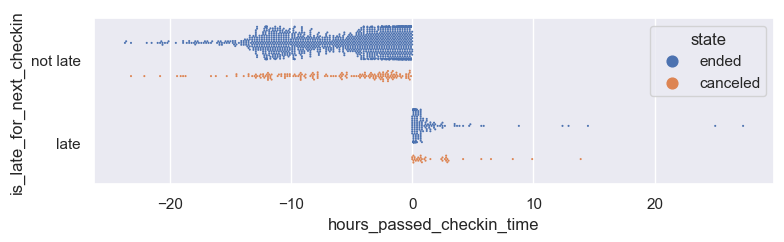

In [439]:
data = df[ (df['time_delta_with_previous_rental_in_minutes'].isna() == False)
          & (df['hours_passed_checkin_time'] > -24)  &(df['hours_passed_checkin_time'] < 36) 
         ]
plt.figure(figsize=(8,2.5))
sns.swarmplot(data=data,x="hours_passed_checkin_time", y='is_late_for_next_checkin', 
              hue="state", dodge=True, size=1.5)


plt.tight_layout()


plt.show()

According to this plot, 
- in the cases where the vehicle would have a second rental, most drivers returned their car between 14 hours before to 2 hours after original checkout date.
- the ratio of canceled:non-canceled bookings seems to have increased gradually if the car still had not returned 5 hours before the next check-in. This might be either due to company's notifying the next driver about the current situation and driver ending up finding other options and canceling immediately or due to company's failing to make the car ready within a 5-hour interval (or less) and driver's canceling the booking once they see their car not ready on the check-in time, we do not know. The information on the time of cancelation decision is not provided, therefore, we only know how late it was when the car has finally returned.
- As seen, there are really few drivers who keeps waiting passed the check-in time.

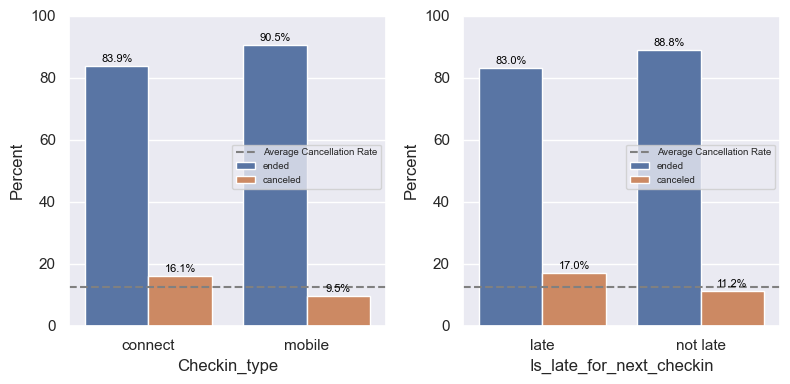

In [419]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
plt.subplot(1,3,1)

data = df[df['time_delta_with_previous_rental_in_minutes'].isna() == False]


average_cancel = len(data[data['state']=='canceled']) / len(data) * 100


for i, col in enumerate(['checkin_type', 'is_late_for_next_checkin'], start=1):
    plt.subplot(1, 3, i)  # Create subplots side by side
    df_n2 = data.groupby(col)['state'].value_counts(normalize=True)
    df_n2 = df_n2 * 100
    df_n2 = df_n2.rename('percent').reset_index()
    g = sns.barplot(x=col, y='percent', hue='state', data=df_n2)
    g.set_ylim(0, 100)
    plt.axhline(y=average_cancel, color='grey', linestyle='--', label='Average Cancellation Rate')
    plt.xlabel(col.capitalize())
    plt.ylabel('Percent')

    plt.legend(fontsize='xx-small', bbox_to_anchor=(0.5, 0.3, 0.5, 0.3))
    for p in g.patches:
        g.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')


plt.tight_layout()
plt.show()

The figures above again uses only the data from the rentals for which there was an anticipated second booking within the 12 hours after previous checkout.
- The first figure shows that cancelation is more common among the drivers using connect than drivers who signed mobile contracts. 
- The second figure shows that when the previous driver is late, the likelihood of the next driver to cancel is higher than the average cancelation rate amonf the second drivers.
- The dashed line shows the average cancelation late AMONG the drivers whose cars were previously rented by another driver.

## Can we avoid returns after the next checkin ?
- we have seen that customers in average returns cars with an hour delay from the expected checkout that.
- the company in turn tends to provide less than an hour interval between two rentals for approximately 25% of the cases.
- Let's explore how much of the cancelations could be related to this choice and therefore could be avoided.

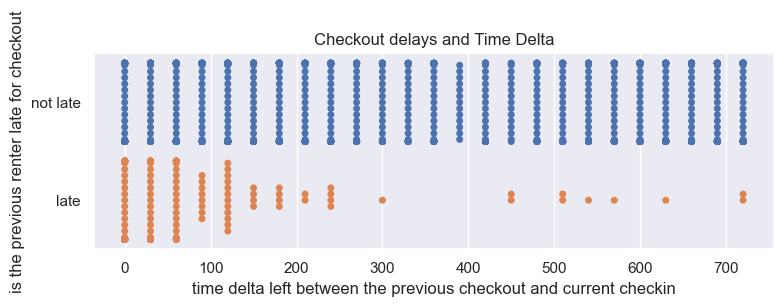

In [440]:
plt.figure(figsize=(8, 3))  # Set figure size

sns.swarmplot(data=data, y='is_late_for_next_checkin', x='time_delta_with_previous_rental_in_minutes', 
             )

plt.xlabel('time delta left between the previous checkout and current checkin')
plt.ylabel('is the previous renter late for checkout')
plt.title('Checkout delays and Time Delta')

plt.tight_layout()
plt.show()

The figure above illustrates that increasing the time interval between two consecutive rentals would have indeed decreased the number of returns late for the next check-in. 

### So what if the company introduce a minimum threshold for the time delta between two consecutive intervals? 
## Which share of our owner’s revenue would potentially be affected by the feature?

In [402]:
rented_again = df[df['time_delta_with_previous_rental_in_minutes'].isna()==False]
print('The number of cars rented again within the next 12 hours from previous checkout is', 
      len(rented_again), 
     'which means', round(len(rented_again)/len(df)*100,2),'% of all rentals')

print('The number of cars that are late for next check-in is', len(df[df['is_late_for_next_checkin']=='late']), 
      'which is',round(len(df[df['is_late_for_next_checkin']=='late'])/ len(df)*100,2), "% of all rentals")
print("Note that we only have late/not late information for", 
      len(df[df['is_late_for_next_checkin'].isna()==False]), "of second rental cases.")

The number of cars rented again within the next 12 hours from previous checkout is 1841 which means 8.64 % of all rentals
The number of cars that are late for next check-in is 218 which is 1.02 % of all rentals
Note that we only have late/not late information for 1724 of second rental cases.


To estimate the share of revenue with the introduction of such a feature, we actually need rental price of information on the cars that were late. 
- It can be the case that cars that are freuently late for next check-in belonging to a particular model or type - that can alter the price. For example, if there is a model that frequently breaks down and causes delays, or if there is a tendance to return vans later than sedans, we should know that. 
- However, assuming all cars have same average traits, in the case of finding an optimal threshold that would hypothetically not deter the next drivers for renting the car alltogether due to the delayed availability information on our platform, this feature can potentially affect the 1.02% of our revenue.

## How many rentals would be affected by the feature depending on the threshold and scope we choose?
While the number of the rentals we want to affect is 218 in the optimal scenario, in reality this number will highly depend on the threshold and scope we choose.
- Threshold refers to the minimum time interval we decide to implement between two rentals.
- Scope refers to the decision to apply such a threshold to only connect cars, only mobile check-in cars vs all cars.

### Number of bookings that wouldn't have been allowed on the originally asked pick-up time
- Choosing a threshold interval for making a car available for booking again after its anticipated checkout date means that depending on the threshold some of the bookings we had received would not have been authorized in that hypothetical threshold.
- Below we will see how many rentals would have become unauthorized for thresholds ranging from 0 to 800 minutes.

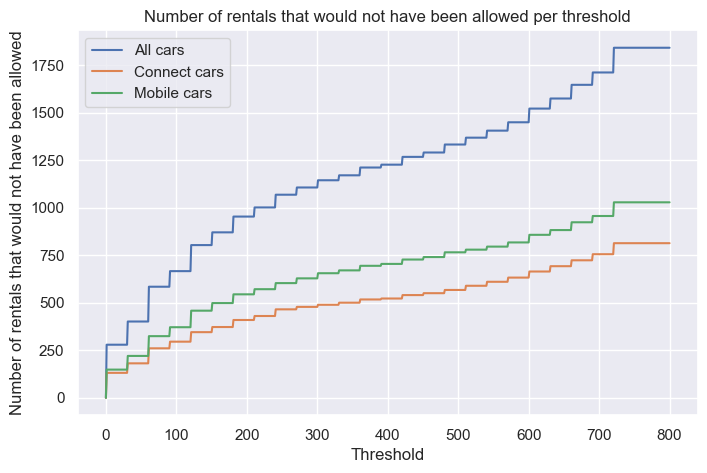

In [403]:
affected_count = []
affected_count_c = []
affected_count_m = []

df_affected = df[df['time_delta_with_previous_rental_in_minutes'].isna()==False]
df_affected_c = df[(df['checkin_type']=='connect')&(df['time_delta_with_previous_rental_in_minutes'].isna()==False)]
df_affected_m = df[(df['checkin_type']=='mobile')&(df['time_delta_with_previous_rental_in_minutes'].isna()==False)]

for threshold in range(801):
    count = df[df['time_delta_with_previous_rental_in_minutes'] < threshold].shape[0]
    affected_count.append(count)
    count_c = df_affected_c[df_affected_c['time_delta_with_previous_rental_in_minutes'] < threshold].shape[0]
    affected_count_c.append(count_c)
    count_m = df_affected_m[df_affected_m['time_delta_with_previous_rental_in_minutes'] < threshold].shape[0]
    affected_count_m.append(count_m)
    
    
# Plotting the graph

plt.figure(figsize=(8, 5))  # Adjust figure size as needed
plt.plot(range(801), affected_count, label = 'All cars')
plt.plot(range(801), affected_count_c, label = 'Connect cars')
plt.plot(range(801), affected_count_m, label = 'Mobile cars')
plt.xlabel('Threshold')
plt.ylabel('Number of rentals that would not have been allowed')
plt.title('Number of rentals that would not have been allowed per threshold')
plt.legend()

plt.show()

Remember : Increasing the threshold interval means decreasing the availability of our cars, receiving fewer bookings and therefore comprimising our revenue.

- Therefore, we need to select a threshold such that it would solve the problem of delayed checkouts passing the next checkin time, therefore, minimize the cancelations related to it, while at the same time making sure that we are not sacrificing much of the potential revenues.

- For example, we know that the average time delta in our dataset is near 279 minutes but if we decide to select this as our threshold just by assuming that it reflects the average preference behavior of customers, we would have unathorized near 1000 of our bookings.
- We need to know how much delay in their preferred checkin date can customers tolerate, and after which point they give up and search for other options.

- Let's assume two scenarios in which drivers will go for another company if there was no available car in the next 2 vs 4 hours from their selected date.


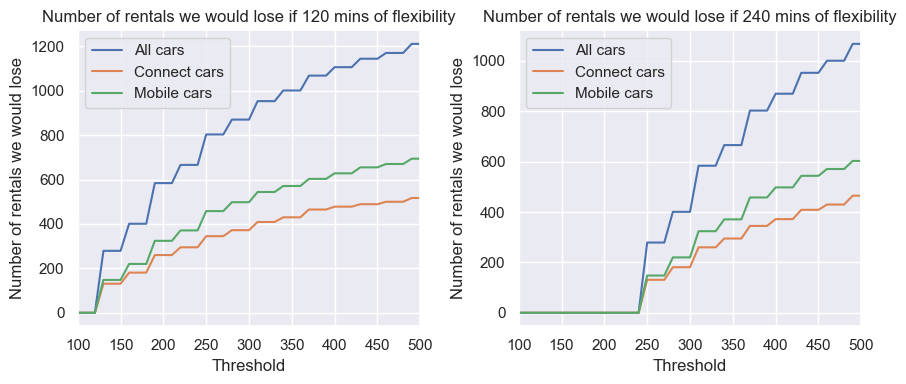

In [404]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))  # Create a figure with two subplots

for i, item in enumerate([120, 240]):
    affected_count = []
    affected_count_c = []
    affected_count_m = []

    for threshold in range(0,501,10):
        count = df_affected[df_affected['time_delta_with_previous_rental_in_minutes'] + item < threshold].shape[0]
        affected_count.append(count)
        count_c = df_affected_c[df_affected_c['time_delta_with_previous_rental_in_minutes'] + item < threshold].shape[0]
        affected_count_c.append(count_c)
        count_m = df_affected_m[df_affected_m['time_delta_with_previous_rental_in_minutes'] + item < threshold].shape[0]
        affected_count_m.append(count_m)
    
    # Plotting in the respective subplot
    axs[i].plot(range(0,501,10), affected_count, label='All cars')
    axs[i].plot(range(0,501,10), affected_count_c, label='Connect cars')
    axs[i].plot(range(0,501,10), affected_count_m, label='Mobile cars')
    axs[i].set_xlabel('Threshold')
    axs[i].set_ylabel('Number of rentals we would lose')
    axs[i].set_title(f'Number of rentals we would lose if {item} mins of flexibility')
    axs[i].legend()
    axs[i].set_xlim(100,500)

    axs[i].set_xticks(np.arange(100, 501, 50))  # Adjust the step size to control the number of ticks
    axs[i].grid(True)

plt.tight_layout()
plt.show()

Following our assumption of drivers with 2 hours flexibility from their chosen time:
- Obviously if we select a threshold below 120 minutes, we can keep all our bookings without losing any revenue, regardless of the scope of our choice.
- In the current situation, we have 218 problematic case that got cancelled. So any threshold that would require us to unauthorize more than 2x218 = 436 rentals makes no sense, since even if the threshold had solved all the problematic cancelations, we would have been better-off sticking to the current scenario.
- Therefore, we shouldn't probably go for a threshold over 180 minutes if applied to all cars, or we would lose more than 436 business - worsened-off than contemporary scenario.
- If we limit our scope to only connect cars, we can go for a threshold of 350 minutes and we would still lose less than 436 of our bookings.
- If we want to apply the feature only to mobile cars, we should stick somewhere around 240 minutes.

If we assume our drivers to have more flexibility and would not choose another company as long as they could find a car 4 hours later from their preferred slot:
- we can comfortably apply a threshold as high as 240 minutes without losing any business since it's within the flexibility range of our customers
- if we apply the threshold feature to all cars, we can go up to 300 minutes approximately.
- If we are to apply our feature only on Connect cars, we could select a threshold of 450 minutes and we would still risk less rentals than 436.
- If we are going to apply the features only on the mobile cars, we should be slightly more conservative and choose something around 360 minutes.

### Attention:
There is a trade-off between the degree of minutewise flexibility we assume our customers to have and the level of threshold we can go for. The less flexible we see them, the more conservative threshold levels we should stick to.
For example, let's make an extreme assumption of zero flexibility in which they would not book any car unless there is an availability 10 minutes from what they were looking.

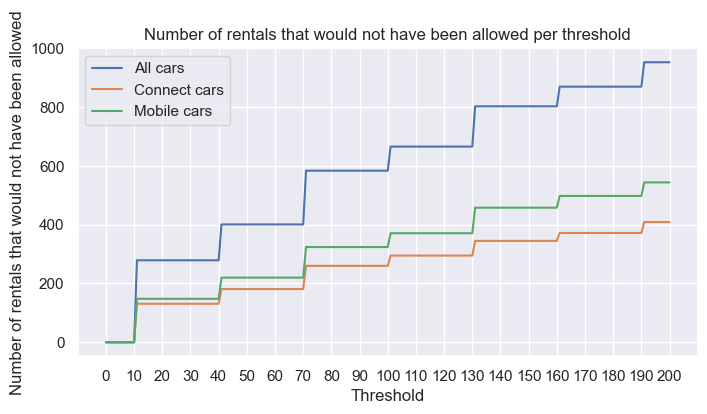

In [405]:
affected_count = []
affected_count_c = []
affected_count_m = []

df_affected = df[df['time_delta_with_previous_rental_in_minutes'].isna()==False]
df_affected_c = df[(df['checkin_type']=='connect')&(df['time_delta_with_previous_rental_in_minutes'].isna()==False)]
df_affected_m = df[(df['checkin_type']=='mobile')&(df['time_delta_with_previous_rental_in_minutes'].isna()==False)]

for threshold in range(201):
    count = df[df['time_delta_with_previous_rental_in_minutes'] +10 < threshold].shape[0]
    affected_count.append(count)
    count_c = df_affected_c[df_affected_c['time_delta_with_previous_rental_in_minutes']+10 < threshold].shape[0]
    affected_count_c.append(count_c)
    count_m = df_affected_m[df_affected_m['time_delta_with_previous_rental_in_minutes']+10 < threshold].shape[0]
    affected_count_m.append(count_m)
    
    
# Plotting the graph

plt.figure(figsize=(8, 4))  # Adjust figure size as needed
plt.plot(range(201), affected_count, label = 'All cars')
plt.plot(range(201), affected_count_c, label = 'Connect cars')
plt.plot(range(201), affected_count_m, label = 'Mobile cars')
plt.xlabel('Threshold')
plt.ylabel('Number of rentals that would not have been allowed')
plt.title('Number of rentals that would not have been allowed per threshold')

plt.xticks(np.arange(0, 201, 10))  # Adjust the step size to control the number of ticks
plt.grid(True)
plt.legend()


plt.show()

Note that in an extreme case like this, we could raise the threshold only up to 40 minutes if applied to all cars and up to 130 minutes if applied only to the mobile cars and 190 minutes if applied only to the connect cars, if we want our new feature to make sense in the business sense.

### Cases remaining problematic
The figure below estimates and visualizes the number of vehicles that would still have been late for the next check-in even after applying a threshold of our choice. So it demonstrates the number of problematic cases remaining unsolved for each threshold.

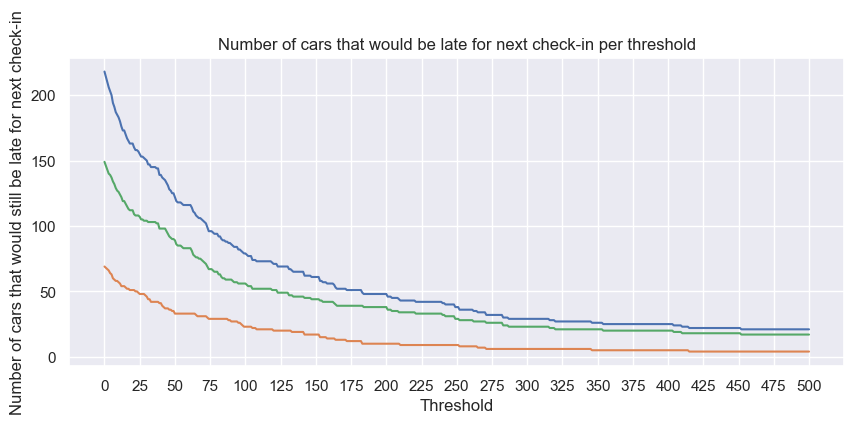

In [406]:
problem_count = []
problem_count_c = []
problem_count_m = []

df_problem = df[df['time_delta_with_previous_rental_in_minutes'].isna()==False]
df_problem_c = df[(df['checkin_type']=='connect')&(df['time_delta_with_previous_rental_in_minutes'].isna()==False)]
df_problem_m = df[(df['checkin_type']=='mobile')&(df['time_delta_with_previous_rental_in_minutes'].isna()==False)]
                  
for threshold in range(501):  # Range from 0 to 800 (inclusive)
    mask = (
        (df_problem['previous_drivers_delay_in_mins'] > df_problem['time_delta_with_previous_rental_in_minutes']) 
        &(df_problem['previous_drivers_delay_in_mins'] > threshold)
    )
    mask_c = (
        (df_problem_c['previous_drivers_delay_in_mins'] > df_problem_c['time_delta_with_previous_rental_in_minutes']) 
        &(df_problem_c['previous_drivers_delay_in_mins'] > threshold)
    )
    mask_m = (
        (df_problem_m['previous_drivers_delay_in_mins'] > df_problem_m['time_delta_with_previous_rental_in_minutes']) 
        &(df_problem_m['previous_drivers_delay_in_mins'] > threshold)
    )

    count = sum(mask)
    problem_count.append(count)
    count_c = sum(mask_c)
    problem_count_c.append(count_c)
    count_m = sum(mask_m)
    problem_count_m.append(count_m)
    
plt.figure(figsize=(10, 4))  # Adjust figure size as needed
plt.plot(range(501), problem_count, label = 'All cars')
plt.plot(range(501), problem_count_c, label = 'Connect cars')
plt.plot(range(501), problem_count_m, label = 'Mobile cars')
plt.xlabel('Threshold')
plt.ylabel('Number of cars that would still be late for next check-in')
plt.title('Number of cars that would be late for next check-in per threshold')
plt.xticks(np.arange(0, 501, 25))
plt.legend


plt.show()

## How many problematic cases will it solve depending on the chosen threshold and scope?

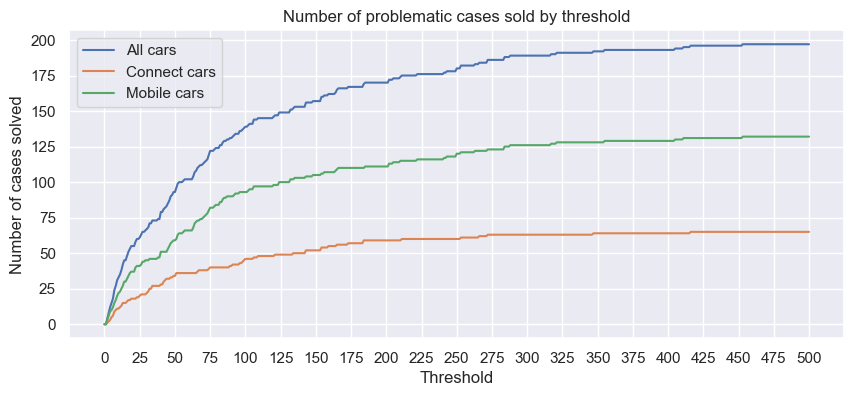

In [407]:
df_pb = df[df['is_late_for_next_checkin'] == 'late']

solved = []
solved_c = []
solved_m = []

for threshold in range(501):
    count = df_pb[df_pb['previous_drivers_delay_in_mins'] < threshold].shape[0]
    count_c = df_pb[(df_pb['checkin_type']=='connect') & (df_pb['previous_drivers_delay_in_mins'] < threshold)].shape[0]
    count_m = df_pb[(df_pb['checkin_type']=='mobile') & (df_pb['previous_drivers_delay_in_mins'] < threshold)].shape[0]
    solved.append(count)
    solved_c.append(count_c)
    solved_m.append(count_m)
    
plt.figure(figsize=(10, 4))  # Adjust figure size as needed
plt.plot(range(501), solved,  label = 'All cars')
plt.plot(range(501), solved_c,  label = 'Connect cars')
plt.plot(range(501), solved_m, label = 'Mobile cars')
plt.xlabel('Threshold')
plt.ylabel('Number of cases solved')
plt.title('Number of problematic cases sold by threshold')
plt.xticks(np.arange(0, 501, 25))
plt.legend()


plt.show()
    

                                                    

- Remember that if we stick to the customer type with 120 mins of flexibility, we cannot raise the threshold beyond 180 for all-cars-applications, 240 minutes for mobile scope, and 350 minutes for the connect scope applications.
- On the other hand, in the 240-minutes-flexibility model, we can raise the threshold up to 300, 360 and 450 respectively.
- In the 120-minutes flexibility model, we can directly raise our threshold to 120 minutes within the range of customer flexibility and this would solve us a bit less than 150 cases in all-car-scope-application, a bit less than 100 cases in only mobile scope and slightly less than 50 cases in connect-only scope already.
- In the 240-minutes flexibility model, we can directly raise our threshould to 4 hours without losing any business due to the threshold. If we do that for all cars, we solve 175 of the problematic cases, if we go for connect-only threshold, we would end up solving only 60 cases though.



## Counterfactual Scenario for various flexibility degrees, thresholds and scopes
Notice that in reality there is no way for us to know which customer will be deterred by the threshold we introduce because they cannot pick-up the vehicle on the time they want and which customers will be among the group who would give up cancelation just thanks to the presence of a such threshold.
So let's run a counterfactual scenario on the current data we have and try to estimate what would have happened if had placed such a threshold before all these rentals. How many non-problematic (non-canceled) bookings could we have finalized?
In the code below, I will take into account both the customers deterred from renting a car due to not being flexible for that selected threshold and the customers who would not cancel because their cars had not been late.

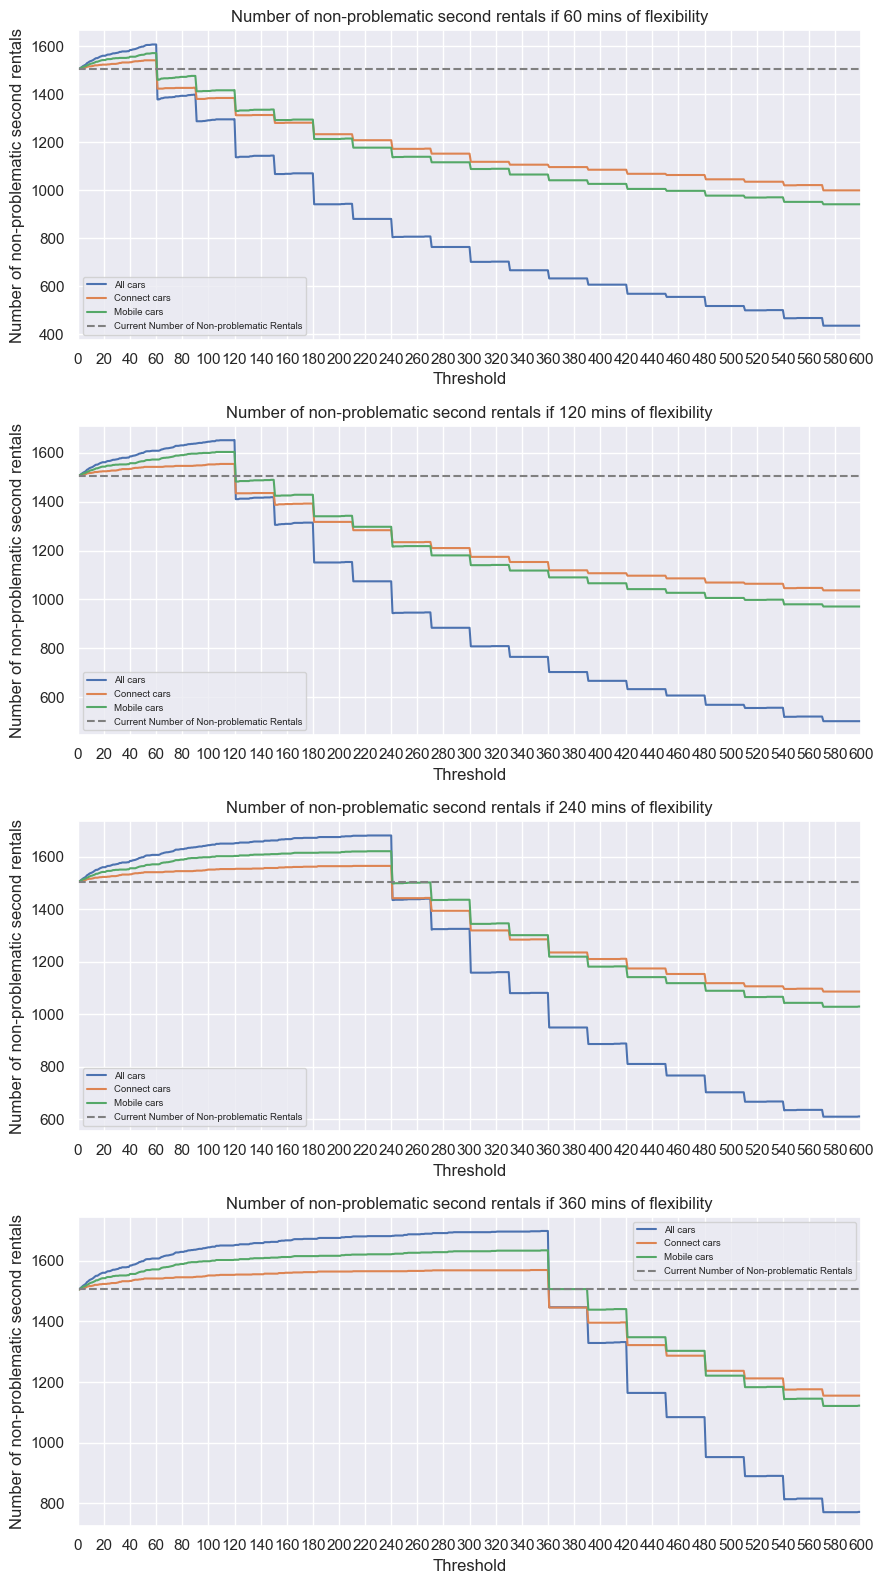

In [435]:
fig, axs = plt.subplots(4, 1, figsize=(9, 16))  # Create a figure with two subplots
df_affected = df[df['is_late_for_next_checkin'].isna()==False]
df_affected_c = df[(df['checkin_type']=='connect')&(df['is_late_for_next_checkin'].isna()==False)]
df_affected_m = df[(df['checkin_type']=='mobile')&(df['is_late_for_next_checkin'].isna()==False)]

not_late_c = len(df_affected_c[df_affected_c['is_late_for_next_checkin'] == 'not late'])
not_late_m = len(df_affected_m[df_affected_m['is_late_for_next_checkin'] == 'not late'])

for i, item in enumerate([60, 120, 240, 360]):
    profit_count = []
    profit_count_c = []
    profit_count_m = []

    for threshold in range(601):
        
        ## first let's check if the customers would have been able to book within their flexible time frame
        
        still_rent = df_affected[df_affected['time_delta_with_previous_rental_in_minutes'] + item >= threshold]
        still_c = df_affected_c[df_affected_c['time_delta_with_previous_rental_in_minutes'] + item >= threshold] 
        still_m = df_affected_m[df_affected_m['time_delta_with_previous_rental_in_minutes'] + item >= threshold]
        



        gain = still_rent[
            (still_rent['previous_drivers_delay_in_mins'] < threshold) |
            (still_rent['previous_drivers_delay_in_mins'] < still_rent['time_delta_with_previous_rental_in_minutes'])
        ].shape[0]
                
        gain_c = still_c[(still_c['previous_drivers_delay_in_mins'] < threshold) |
                                  (still_c['previous_drivers_delay_in_mins'] <
                                   still_c['time_delta_with_previous_rental_in_minutes'])].shape[0] + not_late_m
        
        gain_m = still_m[(still_m['previous_drivers_delay_in_mins'] < threshold) |
                                  (still_m['previous_drivers_delay_in_mins'] <
                                   still_m['time_delta_with_previous_rental_in_minutes'])].shape[0] + not_late_c
        
        profit_count.append(gain)
        profit_count_c.append(gain_c)
        profit_count_m.append(gain_m)

    
        # Plotting in the respective subplot
    axs[i].plot(range(601), profit_count, label='All cars')
    axs[i].plot(range(601), profit_count_c, label='Connect cars')
    axs[i].plot(range(601), profit_count_m, label='Mobile cars')
    axs[i].axhline(y=len(df[df['is_late_for_next_checkin'] == 'not late']), 
                color='grey', linestyle='--', label='Current Number of Non-problematic Rentals')
   
    axs[i].set_xlabel('Threshold')
    axs[i].set_ylabel('Number of non-problematic second rentals')
    axs[i].set_title(f'Number of non-problematic second rentals if {item} mins of flexibility')
    axs[i].legend(fontsize='xx-small')
    axs[i].set_xlim(0,600)

    axs[i].set_xticks(np.arange(0, 601, 20))  # Adjust the step size to control the number of ticks
    axs[i].grid(True)

plt.tight_layout()
plt.show()





## Final remarks on threshold:
- As one can expect all at the threshold 0, all graphs start from the same point which represent the current outcome.
- Until we reach the maximum flexibility interval of customers, the application of the threshold on all cars lead to a steeper increase in the number of successful rentals, which is logical. 
- On the other hand, beyond the maximum flexibility interval of users, it becomes the option that makes business lose customers and money with the highest acceleration. (a steeper decline)
- There are several naive assumptions we have so far made, which does not reflect the real world.
- First, we cannot know the maximum flexibility interval of users for sure, neither will it be shared nor distributed evenly among different groups of users.
- Second, we kept assuming that preventing delay beyond the next check-in time could solve all cancelations by the drivers who canceled in that situation but there is a decent chance that these drivers would have canceled anyway.

#### Therefore:
- Having little knowledge over how flexible the customers are and what percentage of 'late for next check-in' cancelations were actually related to this delay only, it would probably be smarter and safer to limit the scope of the threshold feature to the Connect Cars.
- This way, even in the case we misestimate the flexibility intervals or potential business gains, our loss would not be as dramatic as the all-cars-application scope.

## The end